El aprendizaje no supervisado es cuando no se tiene la variable target, muchas veces en la vida real se tienen muchos datos disponibles pero no se tiene la variable target, en este caso usamos aprendizaje no supervisado, sus principales funciones son:

- Reducción de dimensión.
- Agrupamiento.
- Detección de anomalias.
- Estimación de la densidad.


## Algoritmos de agrupamiento: K means y DBSCAN

Esta es la tarea de identificar observaciones similares y asignarlas a `clusters`. Cada observación queda asignada a un grupo, pero a diferencia de la clasificación esta es una tarea no supervisada. El `clustering` se usa en muchas aplicaciones:

- Segmentación de clientes.
- Analisis de datos.
- Reducción de dimensionalidad.
- Ingenieria de variables.
- Detección de anomalías.
- Aprendizaje semi supervisado.
- Motores de busqueda.
- Segmentación de imagenes.

No hay una definición única de qué es un cluster, depende del contexto y diferentes algoritmos capturan diferentes tipos de cluster.

### K means



In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

Cada observación se asigna a uno de los 5 clusters. En este contexto el `label` de una observación es el indice de el cluster al que el algoritmo lo asigna. KMeans preserva los labels predecidos de las observaciones en las que fué entrenado, disponibles via `labels_`

In [2]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [3]:
y_pred is kmeans.labels_

True

Podemos ver los centroides encontrados por el algoritmo

In [4]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Se puede asignar una nueva observación al centroide que esté más cerca

In [5]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

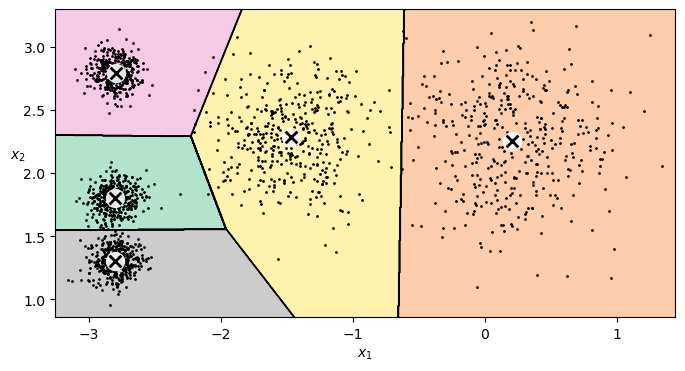

In [6]:
import matplotlib.pyplot as plt

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

En lugar de asignar cada instancia a un cluster (`hard clustering`), puede ser util darle a cada observación un puntaje por cluster (`soft clustering`), el puntaje puede ser la distancia entre la observación y el centroide o un puntaje de `similaridad` como por ejemplo la función `Gaussian radial basis`, el metodo `transform()` mide las distancias de cada observación a cada centroide,

In [7]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

### El algoritmo k means

Se empieza escogiendo los centroides aleatoriamente, etiqueta las observaciones, actualiza las etiquetas, etiqueta las observaciones, actualiza las etiquetas y así iterativamente hasta que los centroides se dejen de mover. Este algoritmo es garantizado que converge dado que la distancia media al cuadrado entre observaciones y su centroide más cercano sólo puede disminuir en cada paso.

Aunque el algoritmo converge, puede convergir a un solución no óptima (convergir en un minimo local). Esto depende de la iniciación del centroide.

### Métodos de inicialización del centroide

Si se conoce donde puede estar el centroide se puede establecer el hiperarámetro `init` como un arreglo de Numpy que contenga una lista de centroides y establecer `n_init = 1`

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

Otra solución es correr el algoritmo varias veces con inicializaciones aleatorias y quedarse con la mejor solución. El número de inicializaciones se establece con el hiperparámetro `n_init`, por defecto está en 10, por lo tanto cada vez que se ajusta el modelo el algoritmo corre 10 vecesy mantiene la mejor solución. 

Para saber cual es la mejor solución usa una metrica llamada `inercia`, la suma se las distancias al cuadrado entre las observaciones y sus centroides.

In [9]:
kmeans.inertia_

211.59853725816836

El metodo `score()` devuelve la inercia negativa ya que cumple con la regla de scikit 'Mejor es mejor'.

In [10]:
kmeans.score(X)

-211.59853725816834

Se propuso el algoritmo *k-means++*, se introdujo un paso de inicialización que tiende a seleccionar centroides lejos de los otros, esto ayuda a que el algoritmo tenga menos probabilidad de converger a una solución subóptima, el algoritmo funciona así:

1. Toma un centroide $c^1$ escogido aleatoriamente uniforme de los datos.
2. Toma un nuevo centroide $c^i$, escogiendo una observación $x^i$ con probabilidad $D(x^i)^2 / \sum D(x^j)^2$, donde $D(x^i)$ es la distancia entre la observación $x^i$ y el centroide más cercano que ya se ha escogido. Esta distribución de probabilidad asegura que las observaciones lejos de los centroides ya escogidos sean más probable que se escojan como centroides.
3. Repetir los pasos anteriores hasta que los k centroides se escojan.

La clase `KMeans` usa esta inicialización por defecto.

### K-means acelerado y k-means por mini lotes

En datos grandes con muchos clusters el algoritmo puede ser acelerado quitando calculos inecesarios de distancia. Esto se hace a través de la desigualdad triangular, este metodo no siempre mejora el tiempo de entrenamiento, a veces hasta lo empeora, depende de los datos, se establece con el hiperparámetro `algorithm = 'elkan'`.

Otra forma es, en lugar de usar todo el conjunto de datosen cada iteración el algoritmo puede usar mini lotes, moviendo los centroides un poco en cada iteración, lo cual hace posible ajustar grandes datos que no caben en la memoria, por ejemplo:

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=42)

Por mini lotes es más rápido que el normal unas 3.5 veces pero en general, va a tener una inercia más alta, así sea un poco.

### Encontrar el numero óptimo de clusters

La inercia no es una buena metrica para escoger el numero de clusters que se va a usar ya que cada vez que se aumenta el numero de cluster esta disminuye, para esto graficamos la inercia en función de k, cuando hacemos esto la curva tiene un punto de inflexión llamado `el codo`.

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


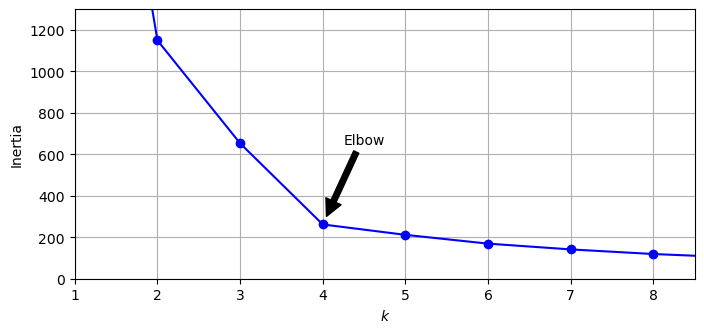

In [12]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

La inercia disminuye rápido hasta que llegamos a 4 clusters, si no sabemos más 4 clusters es una buena opción.

Otra opción para escoger el número de clusters es usar un `puntaje de silueta` el cual es el `coeficiente de silueta` promedio sobre todas las observaciones.

Un `coeficiente de silueta` es igual a $(b-a)/ max(a,b)$, donde a es la distancia media a otras observaciones en el mismo cluster y b es la distancia media al cluster mas cercano (la distancia más corta a la observación más cercana del cluster más cercano).

Este coeficiente va de -1 a +1, un coeficiente cercano a +1 significa que la observación está dentro de su propio cluster y lejos de otros cluster, un coeficiente de 0 indica que está cerca a un limite y un coeficiente de -1 indica que la observación está asignada a un cluster equivocado, para calcularlo en scikit learn usamos:

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6555176425728279

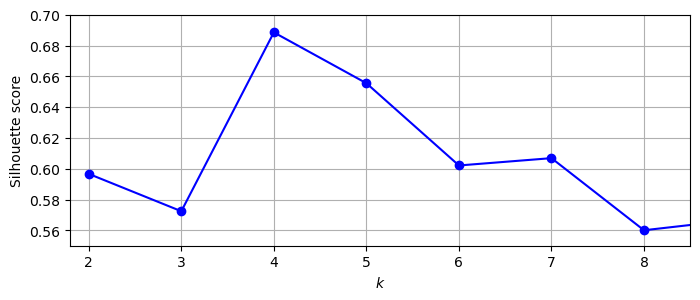

In [14]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

Vemos que 4 si es la opción correcta. Otra forma de visualizar es unar un diagrama de silueta, cada diagrama contiene un cuchillo por cluster. La altura de la figura indica el numero de observaciones en el cluster y su ancho representa el coeficiente de silueta organizado de las observaciones en el cluster (*Entre mas ancho mejor*).

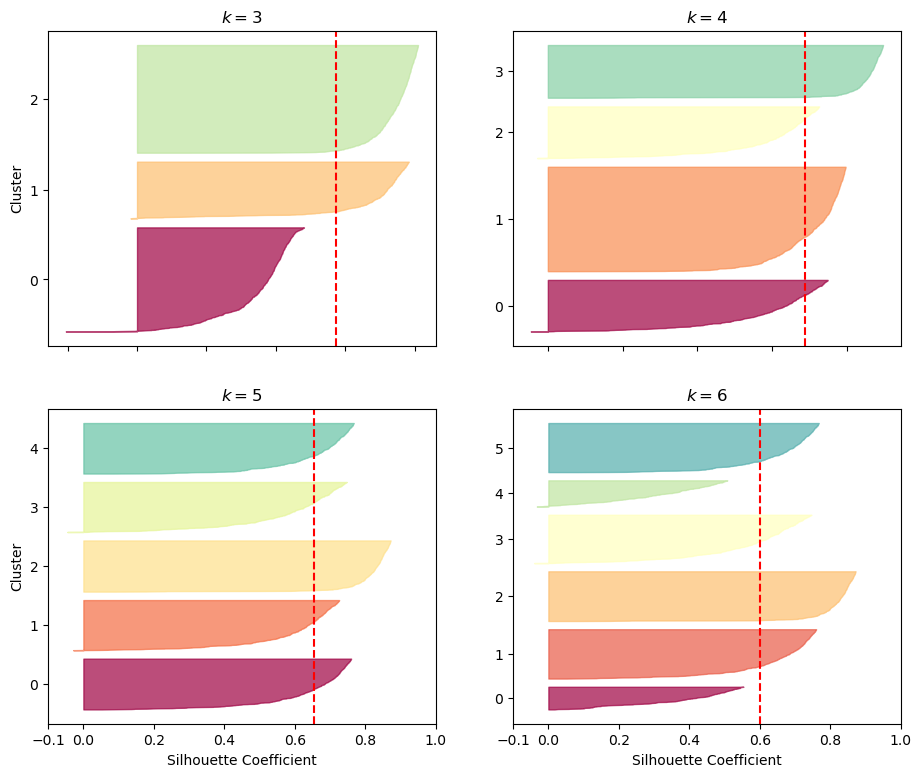

In [15]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

Las lineas verticales representan el puntaje de silueta medio para cada numero de clusters. Vemos que cuando k = 3 o k = 6, tenemos clusters malos, k = 4 o 5 los clusters son buenos, para k = 5 los clusters parecen tener un tamaño más similar, si se quieren clusters con tamaño parecido sería mejor idea usar k = 5.

### Limites de k-means

K-means no se comporta bien cuando los clusters tienen diferentes tamaños, densidades o formas no esfericas.

Es importante escalar las variables antes de correr k-means o los cluster van a quedar estirados y k-means va a tener un rendimiento bajo.

Cuando se tienen clusters elípticos los `modelos de mezcla Gaussianos` funcionan bien.

### Clustering para segmentación de imagén

La segementación de imagen es la tarea de particionar una imagen en multiples segmentos, hay diferentes metodos:

- Segmentación por color: pixeles con color similar se asignan al mismo segmento.
- Segmentación semantica: Todos los pixeles que son parte del mismo tipo de objeto se asignan a un segmento.
- Segmentación de observaciones: Todos los pixeles que sean parte del mismo objeto individual se asignan a un segmento.

Aquí vamos a hacer segmentación de color, 

In [25]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [26]:
import PIL
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

La imagen se representa como un arreglo en 3D, la primer dimensión es la altura, la segunda dimensión es el ancho y la tercer dimensión es el número de canales de color (en este caso RGB).

El siguiente código reforma el arreglo para obtener una lista larga de colores RGB, luego agrupa estos colores usando k-means en 8 clusters

In [27]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

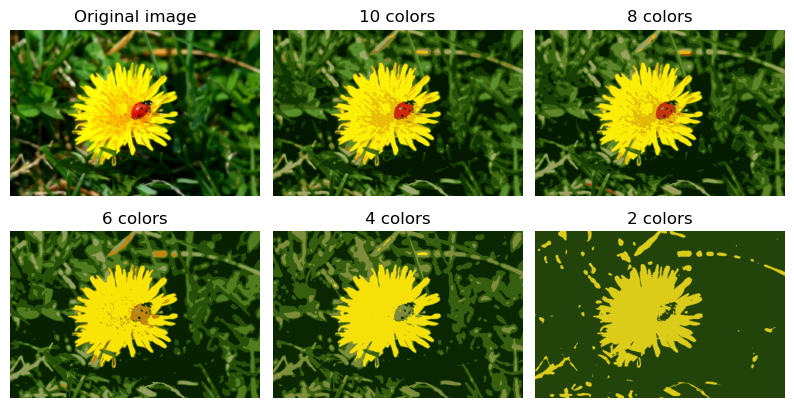

In [28]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

### Usando clustering para aprendizaje semi supervisado

Cuando tenemos muchas observaciones sin marcar, por ejemplo:

In [29]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Supongamos que solo tenemos marcadas 50 observaciones, vamos a entrenar una regresión logistica en esas 50 observaciones:

In [31]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [32]:
log_reg.score(X_test, y_test)

0.7481108312342569

Empecemos agrupando los datos de entrenamiento en 50 cluster, luego, por cada cluster encontramos la imagen más cercana al centroide, esto se llama `imagenes representativas`:

In [33]:
k = 50
kmeans = KMeans(n_clusters = k, random_state = 42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

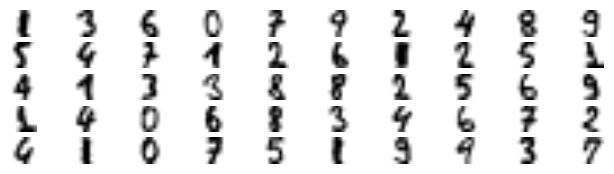

In [37]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [38]:
# ahora marquemos estas 50 observaciones
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

Ahora tenemos un conjunto con solo 50 observaciones marcadas, pero en vez de ser aleatorias, cada una representa una imagen de su cluster, vamos a ver el rendimiento:

In [39]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

Aumentó 10% sólo escogiendo las observaciones representativas, es una buena idea marcar observaciones representativas en lugar de observaciones aleatorias.

Ahora podemos extender esta marca a las otras observaciones del mismo cluster, esto se llama `label propagation`.


In [40]:
y_train_propagated = np.empty(len(X_train), dtype = np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [42]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8942065491183879

Ahora, vamos a ignorar el 1% de observaciones que están más lejos del centro de su cluster, esto elimina algunos outliers.

In [44]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [45]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

`scikit` tiene su clase propia para propagar labels `LabelSpreading` y `LabelPropagation` en el paquete `sklearn.semi_supervised`. Ambas clases construyen una matriz de similitud entre observaciones. También existe una clase `SelfTrainingClassifier`, se da un clasificador base y lo entrena en observaciones marcadas, luego lo usa para predecir observaciones no marcadas, actualiza el conjunto de entrenamiento con las marcas que esté más seguro y repite el proceso.

#### Aprendizaje activo

Es cuando un humano experto interactua con el algoritmo de aprendizaje, marcando observaciones cuando el algoritmo las necesite, una tecnica común es `muestreo de incertidumbre`:

1. El modelo es entrenado en las observaciones marcadas y este modelo es usado para hacer predicciones en las observaciones no marcadas.
2. La observación para la cual el modelo está menos seguro se dan a un experto para que las marque.
3. Se itera el proceso hasta que el rendimiento ganado disminuya y deje de valer la pena.

## DBSCAN

*Density-based spatial clustering of applications with noise* (DBSCAN) define el cluster como una región continua de alta densidad, funciona así:

- Para cada observación, el algoritmo cuenta cuantas observaciones están dentro de una distancia $\epsilon$. Esta región se llama $\epsilon$-neighborhood.

- Si la observación tiene minimo `min_samples` en su $\epsilon$-neighborhood, entonces es considerada una `observación nucleo`.

- Todas las observaciones en el neighborhood de una observación nucleo pertenecen al mismo cluster. El neighborhood puede incluir otras observaciones nucleo, una secuencia de observaciones nucleo forman un cluster.

- CUalquier observación que no sea nucleo y no tenga neighborhood es considerada una anomalia.

In [100]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

Las observaciones con indice igual a -1 son consideradas anomalias, los indices de las observaciones nucleo están disponibles en `core_sample_indices_` y los nucleos están disponibles en `components_`

In [101]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [102]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

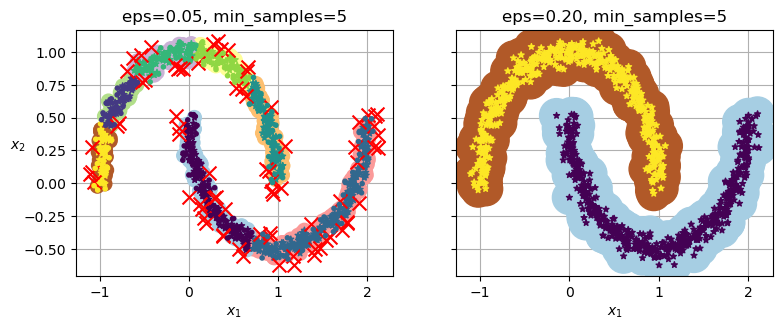

In [103]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

DBSCAN no tiene metodo `predict` pero se pueden usar otros algoritmos

In [104]:
dbscan = dbscan2

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [106]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0], dtype=int64)

In [107]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

In [108]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


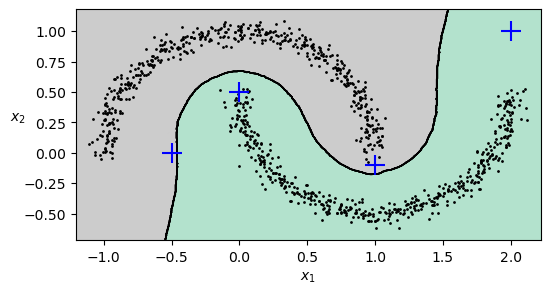

In [109]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

Si no hay la suficiente region de baja densidad alrededor de algunos clusters, DBSCAN puede no capturar los clusters propiamente. Su complejidad computacional es $O(m^2n)$ por lo que no escala bien con conjuntos de datos largos.

También existe el DBSCAN jerarquico, implementado en el proyecto `scikit-learn-contrib` ya que usualmente es mejor que el DBSCAN encontrando clusters de diferentes densidades.

## Otros algoritmos de clustering

### Clustering de aglomeración

Escala bien a largos numeros de observaciones si se da una matriz de conectividad, la cual es una matriz sparse que indica que pares de observaciones son vecinos (`sklearn.neighbors.kneighbors_graph()`), sin esta no escala bien.


In [110]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

learned_parameters(agg)

agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

### BIRCH 

Diseñada especificamente para conjuntos de datos largos, siempre y cuando el numero de variables sea menor a 20.

### Mean Shift

Tiende a cortar clusters en partes cuando tienen una variación interna de densidad, tiene alta complejidad computacional entonces no escala bien a grandes datos.

### Propagación de afinidad

No es necesario escoger el numero de clusters ya que lo hace automaticamente, es buena con clusters de diferente tamaño pero su complejidad computacional la hace no ser buena opción para datos grandes.

### Clustering espectral

Puede capturar clusters con estructuras complejas. No escala bien con largos numeros de observaciones y no se comporta bien con clusters de diferente tamaño.

In [111]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

sc1.affinity_matrix_.round(2)

sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(gamma=1, n_clusters=2, random_state=42)

## Mezcla Gaussiana 

Un *modelo de mezcla gaussiana* (GMM) es un modelo probabilistico que asume que las observaciones fueron generadas de una mezcla de diferentes distribuciones gaussianas cuyos parámetros son desconocidos. Todas las observaciones generadas de una sola distribución gaussiana forman un grupo que generalmente se ve como un elipsoide. Cuando se observa una observación se sabe que fue generada de una de las distribuciones gaussianas, pero no se sabe de cual y no se saben los parámetros de la distribución.

Hay varias variantes de GMM. La mas simple implementada en `GaussianMixture`, se debe saber el numero k de distribuciones gaussianas. El conjunto de datos X se asume fue generado a traves del siguiente proceso probabilistico:

- Para cada observación, se escoge un cluster aleatorio de los k. La probabilidad de escoger el cluster j es el peso del cluster $\phi^j$. El indice del cluster escogido para la observacion i es denotado $z^i$.

- Si la observación $i$ fue asignada al cluster $j$, la locación $x^i$ de esta observación es muestreada de una distribución gaussiana con media $\mu^j$ y matriz de covarianza $\Sigma^j$, $x^i \sim N(\mu^j, \Sigma^j)$.

Dados los datos X, se quiere empezar estimando los pesos $\phi$ y los parámetros de la distribución $\mu^1$ a $\mu^k$ y $\Sigma^1$ a $\Sigma^k$, aquí como se hace:

In [112]:
from sklearn.mixture import GaussianMixture
X, y = make_moons(n_samples=1000, noise=0.05)

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [113]:
gm.weights_

array([0.62522849, 0.18235263, 0.19241888])

In [114]:
gm.means_

array([[ 0.49011911,  0.26238709],
       [-0.78860557,  0.51542654],
       [ 1.77033027, -0.03529057]])

In [115]:
gm.covariances_

array([[[ 0.19525429, -0.12636411],
        [-0.12636411,  0.30012523]],

       [[ 0.0351109 ,  0.0477887 ],
        [ 0.0477887 ,  0.07606045]],

       [[ 0.04416753,  0.05457036],
        [ 0.05457036,  0.08220228]]])

In [116]:
gm.converged_

True

In [117]:
gm.n_iter_

26

In [118]:
gm.predict(X)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2,

In [119]:
gm.predict_proba(X).round(3)

array([[1.   , 0.   , 0.   ],
       [0.868, 0.   , 0.132],
       [0.001, 0.999, 0.   ],
       ...,
       [0.999, 0.   , 0.001],
       [0.   , 1.   , 0.   ],
       [0.004, 0.   , 0.996]])

El modelo de mezcla gaussiano es un `modelo generativo`, esto significa que se pueden muetrear nuevas observaciones de el.

In [120]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.09525292,  1.76830145],
       [ 0.92056224, -0.01116811],
       [ 0.59125821,  0.4795339 ],
       [-0.83534992,  0.41878068],
       [ 1.84074723,  0.01631418],
       [ 1.53013755, -0.19407531]])

In [121]:
y_new

array([0, 0, 0, 1, 2, 2])

También es posible estimar las densidades del modelo en cualquier locación. Se hace usando el metodo `score_samples()`, este da el log de la función de densidad de la probabilidad (PDF)  

In [122]:
gm.score_samples(X).round(2)

array([-1.78, -2.21, -0.94, -1.34, -1.76, -0.45, -1.78, -1.4 , -1.6 ,
       -0.37, -1.64, -1.37, -1.45, -1.6 , -0.97, -1.54, -2.09, -1.31,
       -1.47, -0.4 , -1.42, -1.78, -1.71, -1.83, -1.53, -1.49,  0.01,
       -1.7 , -0.59, -1.3 , -1.38, -0.49, -1.61, -1.69, -0.51, -0.09,
       -1.65, -1.62, -2.38, -1.73, -0.56,  0.25, -1.92, -0.87,  0.1 ,
       -2.49, -1.65, -1.64, -1.19, -0.47, -0.29, -1.72, -1.41, -0.86,
       -1.55, -1.28,  0.13, -1.66, -1.63, -0.55, -0.24, -2.27, -1.33,
       -1.58, -1.28, -0.84, -1.3 , -1.56, -1.74, -1.47, -1.7 , -1.67,
       -1.82, -1.87, -2.19, -1.04, -0.07, -0.14,  0.37, -1.77, -0.39,
       -1.65, -1.82, -1.65, -1.63, -1.02, -1.23, -2.28, -1.75,  0.26,
       -1.53, -2.24, -2.31, -1.62, -2.17, -1.64, -0.1 ,  0.25, -1.73,
       -1.64, -1.57, -0.03, -0.64, -1.61, -1.62, -1.8 , -0.54, -1.56,
       -0.5 , -0.48, -2.  , -1.82, -1.43, -1.48, -0.91, -1.82, -0.02,
       -0.92, -1.75, -0.25, -1.45, -1.56, -1.8 , -1.09, -1.75, -1.73,
       -1.75, -1.51,

In [123]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

1.0000000000000415

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9196\1810030801.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9196\1810030801.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


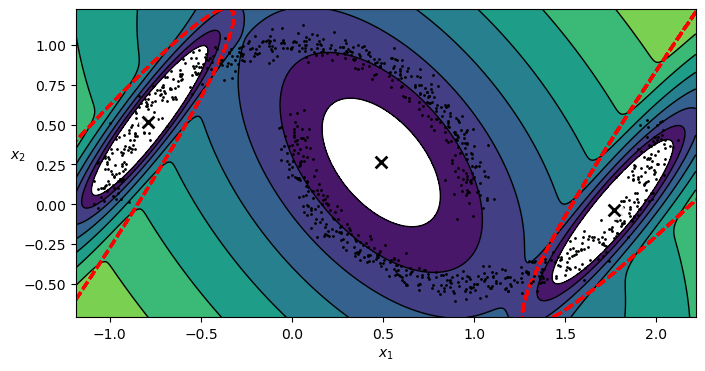

In [124]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

El algoritmo puede ser dificil que converja, en este caso se debe reducir la dificultad de las tareas limitando el número de parámetros que el algoritmo tiene que aprender. Una forma de hacer esto es limitar el rango de figuras y orientaciones que los clusters pueden tener, esto se hace poniendo restricciones en la matriz de covarianza, para hacer esto se establece el hiperparámetro `covariance_type` a:

- 'spherical': Todos los clusters tienen que ser esfericos.
- 'diag': Clusters pueden tener cualquier forma elipsoidal pero los ejes deben estar paralelos al eje.
- 'tied': Todos los clusters deben tener la misma figura elipsoidal, tamaño y orientación.

Por default está establecido en 'full', cada cluster puede tener cualquier figura, tamaño y orientación.

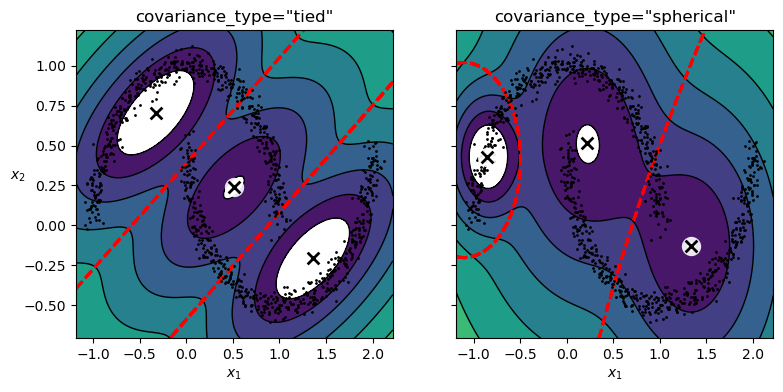

In [125]:
gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

### Mezcla gaussiana para detección de anomalias

Cualquier observación ubicada en una región de baja densidad puede ser considerada una anomalía, para esto se deben definir los limites de densidad para usar, por ejemplo un 2%, si se detectan muchos falsos positivos se puede bajar el limite, si se tienen muchos falsos negativos se puede aumentar el limite, en este ejemplo se van a identificar los outliers usando el percentil 4 como limite

In [126]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

Una tarea parecida es `novelty detection`, la diferencia con la detección de anomalias es que el algoritmo asume que los datos están 'limpios', sin outliers, la detección de anomalias no hace este supuesto.

GMM trata de ajustar todos los datos incluidos los outliers, si se tienen muchos outliers el modelo tal vez los considerará como 'normales'. Para esto se puede tratar de ajustar el modelo una vez, usarlo para detectar y quitar outliers y correr el modelo otra vez en los datos 'limpios'. Otra forma es usar estimación robusta de la covarianza `EllipticEnvelope`.

Como k-means, GaussianMixture requiere que se le digan cuantos clusters debe crear.

### Seleccionando el numero de clusters

Con k-means se usa la inercia. Para GMM no es posible usar estas métricas porque no son confiables cuando los clusters no son esfericos. En cambio se puede encontrar el modelo que minimice *theoretical information criterion* como el `BIC` o el `AIC`.

$$
BIC = \log(m)p-2\log(\hat{l}) \\
AIC = 2p - 2\log(\hat{l})
$$

- m es el numero de observaciones.
- p es el numero de parámetros aprendidos por el modelo.
- $\hat{l}$ es el valor maximizado de la funcion de verosimilitud del modelo.

El BIC y AIC penalizan modelos con más parámetros por aprender y recompensan modelos que ajusten bien los datos, cuando difieren en modelos el BIC tiende a escoger el modelo con menos parámetros pero tiende a no ajustar los datos tan bien.

In [127]:
gm.bic(X)

2707.3093217821092

In [128]:
gm.aic(X)

2623.877482039413

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

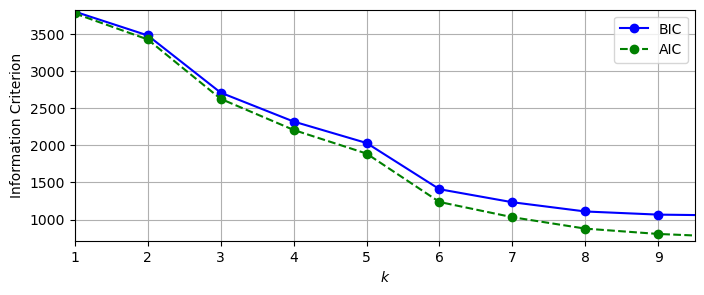

In [131]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

### Modelos de mezcla gaussiana bayesianos

En vez de buscar manualmente el numero óptimo de grupos se puede usa la clase `BayesianGaussianMixture` la cual es capaz de dar pesos de 0 la grupos innecesarios. Establecer el numero de clusters `n_components` a un valor razonable que sea mayor al óptimo.

In [132]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.16, 0.12, 0.13, 0.1 , 0.15, 0.12, 0.12, 0.1 , 0.  , 0.  ])

Detecta que 8 clusters son necesarios. Los GMM funcionan bien en clusters con formal elipsoidal pero no tan bien con otras formas.

## Otros algoritmos para detección de anomalias y novelty

### Fast MCD

Implementado en la clase EllipticEnvelope, util para detección de outliers.

### Isolation forest

Eficiente para detección de outliers, especialmente en datos de alta dimensionalidad. 

### Local Outlier Factor

También bueno para detección de outliers.

### One class SVM

Mejor para detección de novelty.

### PCA y otras tecnicas de reducción de dimensionalidad con un metodo `inverse_transform()`.

Bueno para detección de anomalías.

## Ejercicios


1. How would you define clustering? Can you name a few clustering algorithms?

Clustering es parte de aprendizaje no supervisado, que trata de agrupar observaciones que comparten similitudes, algunos algoritmos son PCA, DBSCAN, GMM, K-means.

2. What are some of the main applications of clustering algorithms?

Detección de outliers, detección de novelty, análisis de datos, sistemas de recomendación, reducción de dimensionalidad, segmentación de clinetes, detección de imagen.

3. Describe two techniques to select the right number of clusters when using k-means.

Se usa la inercia, con el metodo del codo o se puede utilizar el diagrama de siluetas y puntaje de siluetas.

4. What is label propagation? Why would you implement it, and how?

Label propagation es cuando se tienen datos sin marcar y pocos datos marcados, Hacemos un clustering en todas las instancias, luego por cada cluster se encuentra la marca más comun o la mas representativa y propagar esa marca a las observaciones no marcadas en el mismo cluster.

5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

Algoritmos que escalan para datos grandes: 

-  K-means y BIRCH.

Que buscan regiones de alta densidad:

- DBSCAN y Mean shift.

6. Can you think of a use case where active learning would be useful? How would you implement it?

El aprendizaje activo es útil cuando tenemos muchas observaciones sin marcar. En vez de escoger observaciones al azar para marcar es preferible hacer aprendizaje activo, un experto interactua con el algoritmo, dando marcaciones para observaciones especificas que el modelo pida, Un acercamiento común es muestreo de incertidumbre.

7. What is the difference between anomaly detection and novelty detection?

En la detección de anomalías el algoritmo es entrenado en unos datos que puede contener outliers y la meta es identificar estos outliers y outliers en nuevas observaciones. Detección de novelty el algoritmo es entrenado en unos datos que se presume estar 'limpio' y el objetivo es detectar novelties estrictamente en nuevas observaciones.

8. What is a Gaussian mixture? What tasks can you use it for?

Es un modelo probabilistico donde las observaciones son generadas de un mixto de diferentes distribuciones gaussianas cuyos parámetros son desconocidos. Este modelo es util para estimación de densidad, clustering y detección de anomalias.

9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

Se utiliza los criterios BIC y AIC para escoger el numero de clusters, también se puede usar Bayesian Gaussian Mixture Model, el cual automaticamente selecciona el numero de clusters.

10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [133]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Usuario\scikit_learn_data


In [134]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [135]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state = 42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                  olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [137]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [139]:
# para aumentar velocidad se reduce la dimensionalidad usando PCA
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [140]:
# Cluster the images using k means 

from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print(f'k={k}')
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


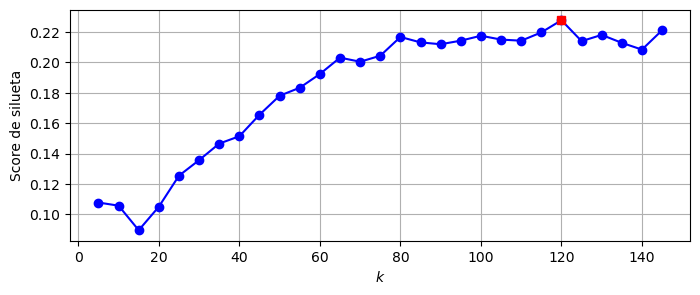

In [141]:
from sklearn.metrics import silhouette_score 

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                    for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize = (8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Score de silueta')
plt.plot(best_k, best_score, 'rs')
plt.grid()
plt.show()

In [142]:
best_k

120

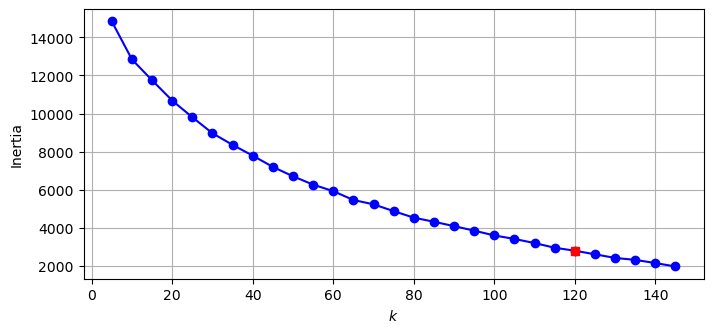

In [143]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

# No hay codo distinguible así que nos quedamos con 120

In [144]:
best_model = kmeans_per_k[best_index]

Cluster 0


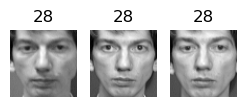

Cluster 1


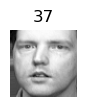

Cluster 2


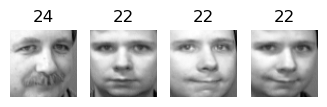

Cluster 3


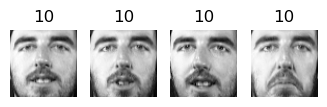

Cluster 4


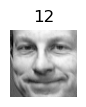

Cluster 5


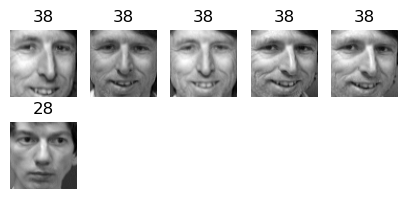

Cluster 6


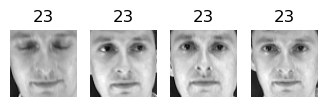

Cluster 7


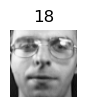

Cluster 8


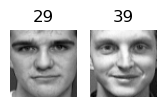

Cluster 9


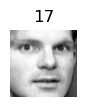

Cluster 10


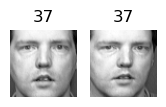

Cluster 11


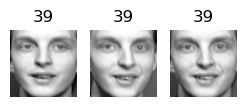

Cluster 12


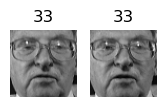

Cluster 13


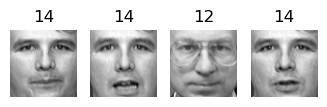

Cluster 14


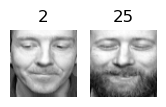

Cluster 15


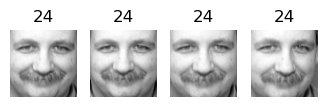

Cluster 16


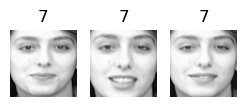

Cluster 17


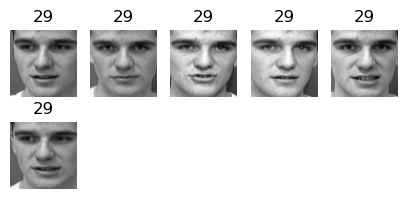

Cluster 18


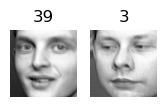

Cluster 19


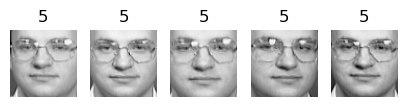

Cluster 20


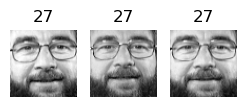

Cluster 21


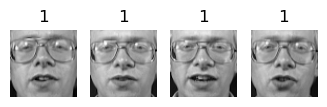

Cluster 22


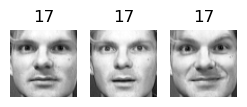

Cluster 23


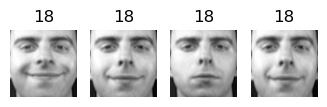

Cluster 24


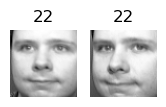

Cluster 25


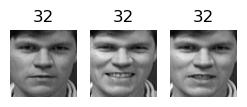

Cluster 26


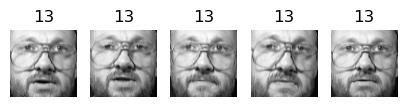

Cluster 27


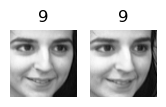

Cluster 28


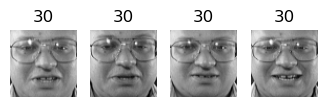

Cluster 29


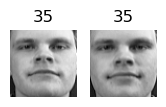

Cluster 30


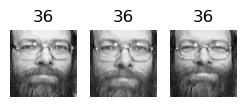

Cluster 31


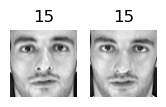

Cluster 32


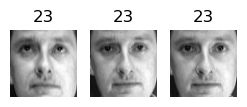

Cluster 33


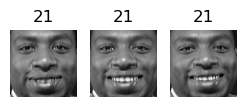

Cluster 34


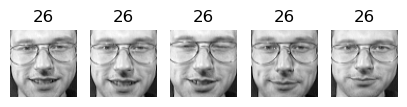

Cluster 35


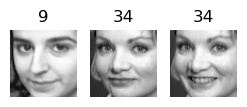

Cluster 36


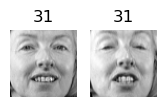

Cluster 37


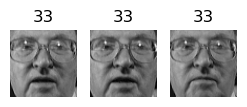

Cluster 38


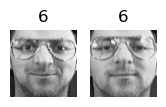

Cluster 39


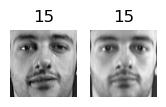

Cluster 40


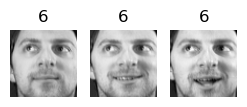

Cluster 41


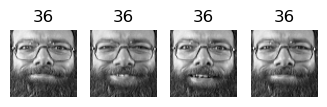

Cluster 42


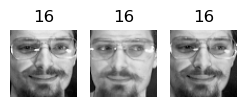

Cluster 43


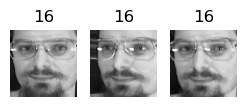

Cluster 44


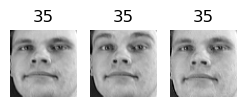

Cluster 45


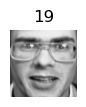

Cluster 46


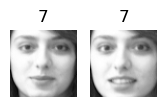

Cluster 47


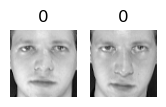

Cluster 48


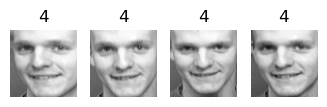

Cluster 49


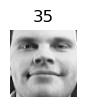

Cluster 50


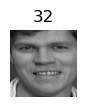

Cluster 51


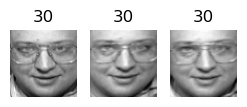

Cluster 52


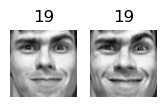

Cluster 53


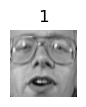

Cluster 54


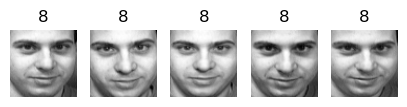

Cluster 55


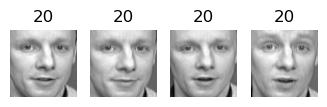

Cluster 56


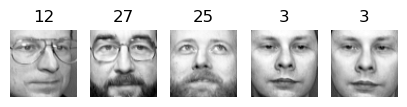

Cluster 57


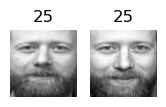

Cluster 58


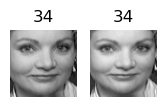

Cluster 59


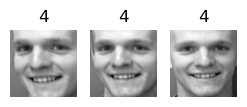

Cluster 60


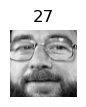

Cluster 61


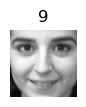

Cluster 62


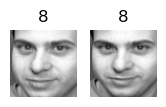

Cluster 63


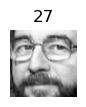

Cluster 64


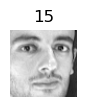

Cluster 65


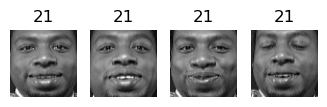

Cluster 66


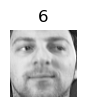

Cluster 67


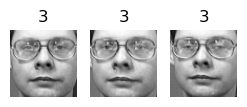

Cluster 68


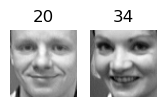

Cluster 69


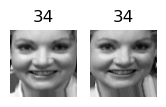

Cluster 70


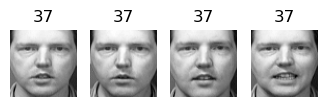

Cluster 71


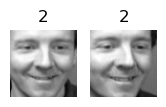

Cluster 72


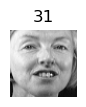

Cluster 73


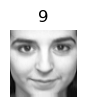

Cluster 74


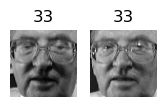

Cluster 75


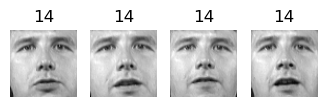

Cluster 76


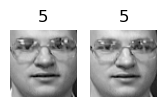

Cluster 77


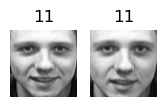

Cluster 78


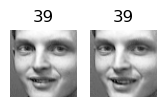

Cluster 79


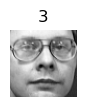

Cluster 80


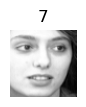

Cluster 81


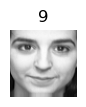

Cluster 82


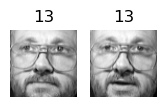

Cluster 83


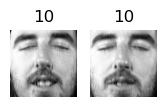

Cluster 84


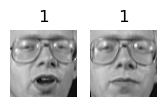

Cluster 85


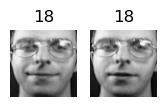

Cluster 86


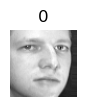

Cluster 87


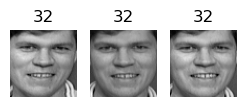

Cluster 88


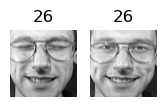

Cluster 89


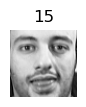

Cluster 90


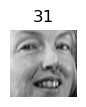

Cluster 91


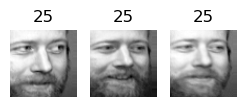

Cluster 92


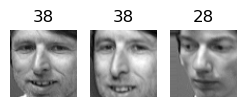

Cluster 93


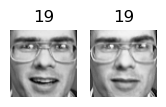

Cluster 94


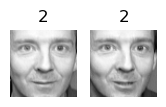

Cluster 95


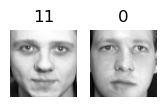

Cluster 96


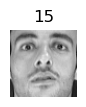

Cluster 97


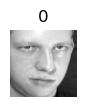

Cluster 98


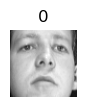

Cluster 99


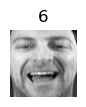

Cluster 100


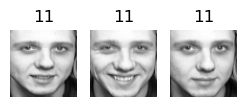

Cluster 101


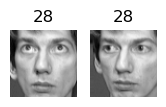

Cluster 102


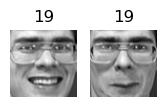

Cluster 103


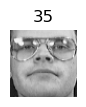

Cluster 104


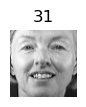

Cluster 105


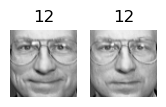

Cluster 106


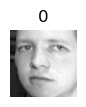

Cluster 107


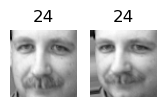

Cluster 108


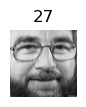

Cluster 109


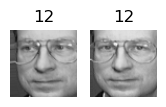

Cluster 110


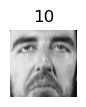

Cluster 111


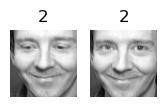

Cluster 112


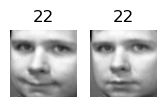

Cluster 113


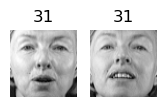

Cluster 114


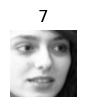

Cluster 115


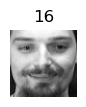

Cluster 116


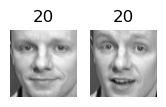

Cluster 117


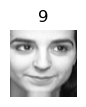

Cluster 118


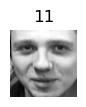

Cluster 119


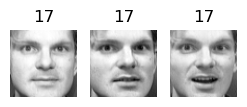

In [145]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Aproximadamente 2 de cada 3 clusters son útiles. Clustering imagenes así es muy impreciso, pero puede ser muy útil para marcar imagenes en un nuevo conjunto de datos.

11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [147]:
# entrenar un clasificador para predecir cual persona es representada en cada imagen

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9

In [148]:
# usar k-means para reducir la dimensionalidad y entrenar en el conjunto reducido

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7

Reducir dimensionalidad no ayudó, empeoró el modelo.

In [149]:
# Buscar el numero de clusters que permite al clasificador tener el mejor rendimiento

from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
    KMeans(n_clusters = n_clusters, random_state = 42),
    RandomForestClassifier(n_estimators = 150, random_state = 42)
)
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.575
15 0.6
20 0.6625
25 0.6625
30 0.6625
35 0.675
40 0.75
45 0.7375
50 0.725
55 0.7125
60 0.7125
65 0.7375
70 0.7375
75 0.7375
80 0.7875
85 0.7625
90 0.75
95 0.7125
100 0.775
105 0.725
110 0.725
115 0.7375
120 0.7
125 0.75
130 0.725
135 0.7375
140 0.7625
145 0.6875


No alcanzamos el 80%, las distancias al centroide del cluster no son tan informativas como las imagenes originales.

In [150]:
# si tratamos de append las variables del conjunto reducido a las variables originales

X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [151]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8125

Igual no es tán buen resultado, en este caso hacer clustering no es tan útil para entrenar un clasificador.

12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

In [152]:
# entrenar un GMM usando PCA conservando 99% de la varianza

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 40, random_state = 42)
y_pred = gm.fit_predict(X_train_pca)

In [153]:
# usar el modelo para generar nuevas caras

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples = n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

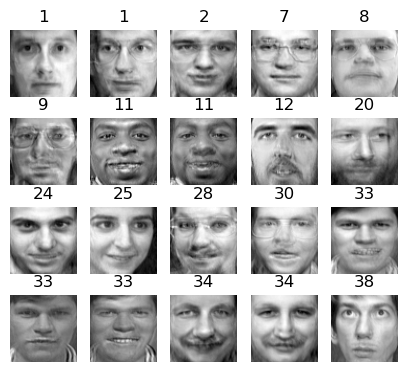

In [154]:
plot_faces(gen_faces, y_gen_faces)

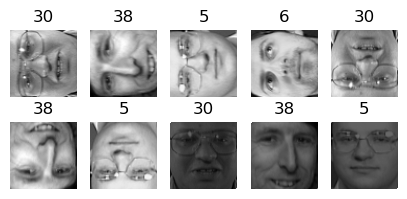

In [155]:
# tratar de modificar algunas imagenes y ver si el modelo detecta las anomalias

n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes = [0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [156]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [157]:
gm.score_samples(X_bad_faces_pca)

array([-2.43643135e+07, -1.89785058e+07, -3.78112465e+07, -4.98187762e+07,
       -3.20479381e+07, -1.37531238e+07, -2.92374218e+07, -1.05489516e+08,
       -1.19576405e+08, -6.74259066e+07])

Las caras malas están consideradas muy poco probables por el GMM, comparemos con algunas observaciones del entrenamiento

In [158]:
gm.score_samples(X_train_pca[:10])

array([1163.02021075, 1134.03638079, 1156.32132918, 1170.67602777,
       1141.4540486 , 1154.35205236, 1091.32894567, 1111.41149555,
       1096.43049169, 1132.98982656])

13. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [159]:
# ya tenemos los datos reducidos

X_train_pca.round(2)

array([[  3.78,  -1.85,  -5.14, ...,  -0.14,  -0.21,   0.06],
       [ 10.15,  -1.53,  -0.77, ...,   0.12,  -0.14,  -0.02],
       [-10.02,   2.88,  -0.92, ...,   0.07,  -0.  ,   0.12],
       ...,
       [  2.48,   2.96,   1.3 , ...,  -0.02,   0.03,  -0.15],
       [ -3.22,   5.35,   1.39, ...,   0.06,  -0.23,   0.16],
       [ -0.92,  -3.65,   2.26, ...,   0.14,  -0.07,   0.06]],
      dtype=float32)

In [160]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [161]:
reconstruction_errors(pca, X_train).mean()

0.00019205351

In [162]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0047073537

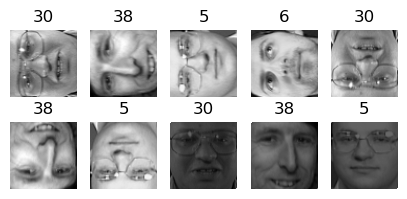

In [163]:
plot_faces(X_bad_faces, y_bad)

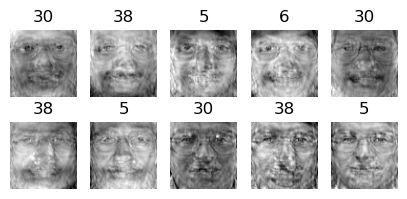

In [164]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)